## Diabetes Predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

In [5]:
dataset = load_diabetes()
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [6]:
# Create a DataFrame with the feature variables
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])

# Add target variable to DataFrame
df['target'] = dataset['target']

# Display the first few rows of the DataFrame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [13]:
# Create independent and dependent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499


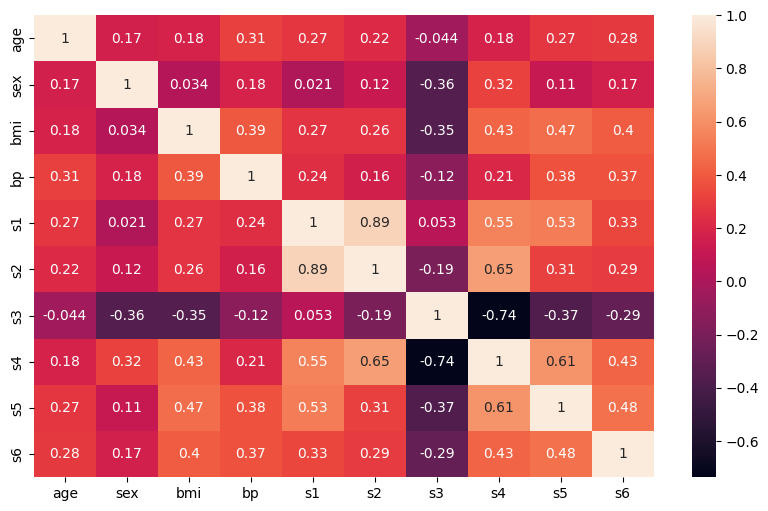

In [17]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.corr(), annot=True);

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print the metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Adjusted R^2 Score: {adj_r2:.2f}')

Mean Absolute Error: 54.53
Mean Squared Error: 4976.80
Root Mean Squared Error: 70.55
R^2 Score: 0.06
Adjusted R^2 Score: -0.06


## Hyperparameter Tuning

In [22]:
params = {
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['sqrt','log2']
}

In [23]:
from sklearn.model_selection import GridSearchCV

# Create Random Seed for reproducibility
np.random.seed(42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=regressor, 
                           param_grid=params, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1,
                           scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

In [24]:
# Print the best parameters, best score, and the best estimator
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')
print(f'Best Estimator: {grid_search.best_estimator_}')

Best Parameters: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'sqrt', 'splitter': 'best'}
Best Score: -4457.1808621544305
Best Estimator: DecisionTreeRegressor(max_depth=3, max_features='sqrt', random_state=42)


In [25]:
# Make predictions on the test data
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print the metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Adjusted R^2 Score: {adj_r2:.2f}')

Mean Absolute Error: 54.00
Mean Squared Error: 4390.13
Root Mean Squared Error: 66.26
R^2 Score: 0.17
Adjusted R^2 Score: 0.07


In [22]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [23]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.20367583041910708
59.4482544111221
5038.877430131429


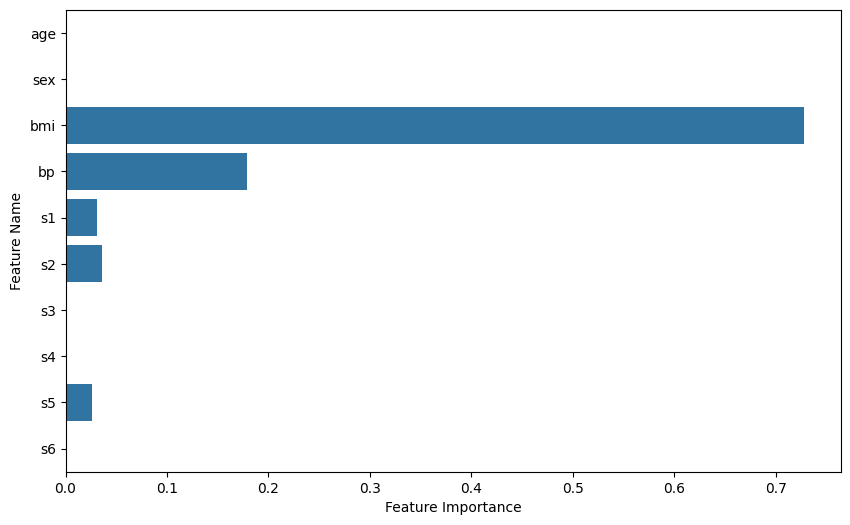

In [26]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
importances = grid_search.best_estimator_.feature_importances_
sns.barplot(x=importances, y=dataset['feature_names'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name');

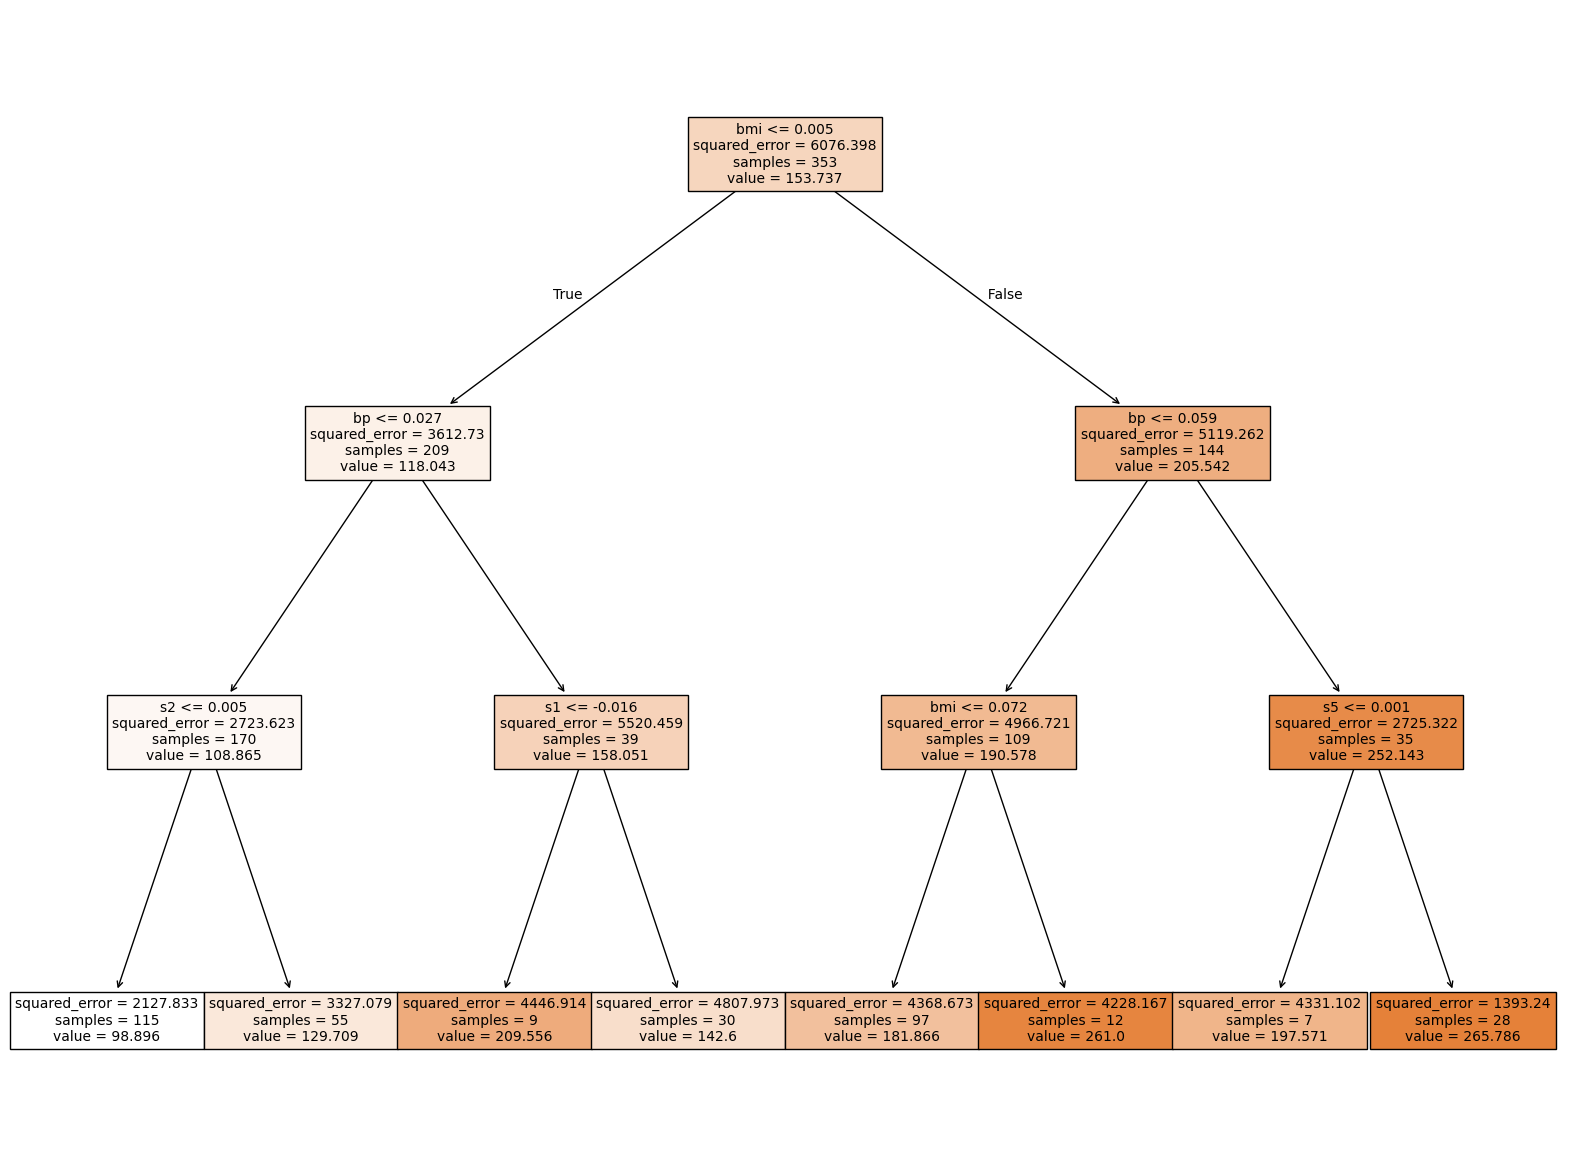

In [32]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 15))
plot_tree(grid_search.best_estimator_, 
          filled=True, 
          feature_names=dataset['feature_names'],
          class_names=dataset['target']);